In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:


from keras.layers import Conv2D,DepthwiseConv2D
from keras.layers import MaxPooling2D, Dense, Flatten,AveragePooling2D, Lambda,AveragePooling3D
import os
import cv2
from sklearn.model_selection import train_test_split
from keras import backend as K
import numpy as np
from keras.models import Model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
from keras.layers.core import Activation, Dropout

from tensorflow.keras.layers import BatchNormalization
from keras.layers import concatenate
from keras.layers import Input
from keras import regularizers
from keras.layers import Layer
# import matplotlib.pyplot as plt
# import sys
from scipy.stats import kurtosis
from keras.optimizers import  Adam,Adagrad
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf


# In[3]:


def LFMCCNN_model(height, width):
    input_shape = (height, width, 1)
    print(input_shape)
    input = Input(shape=input_shape)
    ########## Low-level Feature Modelling
    x = Conv2D(4, (3,3),padding='same')(input)
    x = Activation("relu")(x)
    x = Conv2D(8, (3, 3),padding='same')(x)
    x = Activation("relu")(x)
    x = Conv2D(12, (3, 3),padding='same')(x)
    x = Activation("relu")(x)
    ############## Column-1
    a = Conv2D(12, (7,7),dilation_rate= 3, padding='same')(x)
    a = Activation("relu")(a)
    a=MaxPooling2D((2,2))(a)
    a = Conv2D(15, (6, 6), dilation_rate= 2, padding='same')(a)
    a = Activation("relu")(a)
    a = MaxPooling2D((2,2))(a)
    a = Conv2D(20, (4, 4), dilation_rate= 2, padding='same')(a)
    a = Activation("relu")(a)
    a=MaxPooling2D((2,2))(a)
    a = Conv2D(22, (3, 3), dilation_rate= 1, padding='same')(a)
    a = Activation("relu")(a)
    a=MaxPooling2D((2,2))(a)
    a = Conv2D(30, (2, 2), dilation_rate= 1, padding='same')(a)
    a = Activation("relu")(a)
    ############## Column-2
    b = Conv2D(12, (11,11),dilation_rate= 2, padding='same')(x)
    b = Activation("relu")(b)
    b=MaxPooling2D((2,2))(b)
    b = Conv2D(15, (9, 9), dilation_rate= 2, padding='same')(b)
    b = Activation("relu")(b)
    b=MaxPooling2D((2,2))(b)
    b = Conv2D(20, (7, 7), dilation_rate= 2, padding='same')(b)
    b = Activation("relu")(b)
    b=MaxPooling2D((2,2))(b)
    b = Conv2D(22, (4, 4), dilation_rate= 1, padding='same')(b)
    b = Activation("relu")(b)
    b=MaxPooling2D((2,2))(b)
    b = Conv2D(30, (2, 2), dilation_rate= 1, padding='same')(b)
    b = Activation("relu")(b)
    ############## Column-3
    c = Conv2D(12, (13,13),dilation_rate= 2, padding='same')(x)
    c = Activation("relu")(c)
    c=MaxPooling2D((2,2))(c)
    c = Conv2D(15, (11, 11), dilation_rate= 2, padding='same')(c)
    c = Activation("relu")(c)
    c=MaxPooling2D((2,2))(c)
    c = Conv2D(20, (9, 9), dilation_rate= 2, padding='same')(c)
    c = Activation("relu")(c)
    c=MaxPooling2D((2,2))(c)
    c = Conv2D(22, (5, 5), dilation_rate= 1, padding='same')(c)
    c = Activation("relu")(c)
    c=MaxPooling2D((2,2))(c)
    c = Conv2D(30, (2, 2), dilation_rate= 1, padding='same')(c)
    c = Activation("relu")(c)
    ############### Column-4
    d = Conv2D(12, (5,5),dilation_rate= 2, padding='same')(x)
    d = Activation("relu")(d)
    d=MaxPooling2D((2,2))(d)
    d = Conv2D(15, (3, 3), dilation_rate= 2, padding='same')(d)
    d = Activation("relu")(d)
    d=MaxPooling2D((2,2))(d)
    d = Conv2D(20, (2, 2), dilation_rate= 2, padding='same')(d)
    d = Activation("relu")(d)
    d=MaxPooling2D((2,2))(d)
    d = Conv2D(22, (2, 2), dilation_rate= 1, padding='same')(d)
    d = Activation("relu")(d)
    d=MaxPooling2D((2,2))(d)
    d = Conv2D(30, (2, 2), dilation_rate= 1, padding='same')(d)
    d = Activation("relu")(d)
    f=concatenate([a,b,c,d],axis=3)
    f=Flatten()(f)
    f = BatchNormalization(momentum=0.95)(f)
    model = Model(input, f)
    return model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_data(path):
    x = []
    y = []
    for classes in os.listdir(path):
        for image in os.listdir(path + '/' + classes):
            # print(j, image)
            img = cv2.imread(path + '/' + classes + '/' + image, cv2.IMREAD_ANYDEPTH)
            x.append(img)
            y.append(classes)

    x = np.asarray(x)
    print("High")
    print(x.shape)
    y = np.asarray(y)
    hot = LabelEncoder()
    y_encoded = hot.fit_transform(y)

    y_encoded = to_categorical(y_encoded, num_classes=4)
    return x, y_encoded

if __name__ == '__main__':
    acc = 0

    ap_train = r'/content/drive/MyDrive/fold 1'
    ap_test = r'/content/drive/MyDrive/fold 2'

    # ap_val='F:/Dataset/UCSD_Ped2_Split/AP_Tr_Val/val'

    x1_train, y1_train = load_data(ap_train)
    # x1_val, y1_val = load_data(ap_val)

    x1_test, y1_test = load_data(ap_test)
    print(x1_train.shape)

    x1_train = x1_train.reshape((x1_train.shape[0], x1_train.shape[1], x1_train.shape[2], 1))
    # x1_val = x1_val.reshape((x1_val.shape[0], x1_val.shape[1], x1_val.shape[2], 1))

    x1_test = x1_test.reshape((x1_test.shape[0], x1_test.shape[1], x1_test.shape[2], 1))
    #model1 = cnn_model(x1_train.shape[1], x1_train.shape[2])
   # model2 = dil_cnn(x1_train.shape[1], x1_train.shape[2])
    model3 = LFMCCNN_model(x1_train.shape[1], x1_train.shape[2])
    #print(model1.output_shape)
    #print(model2.output_shape)
    print(model3.output_shape)
    #x = concatenate([model1.output, model2.output, model3.output], axis=3)
    p = Dense(256,activation='relu',kernel_regularizer=regularizers.l2(0.01))(model3.output)
    p = Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01))(p)
    #p = Dense(256, activation= 'relu')(p)
    #p = Dense(128, activation= 'relu')(p)
    #  p = Dense(64, activation='relu')(p)
    p = Dense(4, activation='softmax',kernel_regularizer=regularizers.l2(0.01))(p)

    # ,model3_1.input,model3_2.input,model3_3.input
    model = Model(inputs=[model3.input], outputs=p)
    # sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.95, nesterov=True)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    highacc = 0
   # model = load_model('AD_2.h5')
   # y_predict = model.predict([x1_test, x1_test, x1_test])
   # y_pred = np.argmax(y_predict, axis=1)
   # y_true = np.argmax(y1_test, axis=1)
   # print(y_pred.shape)
   # print(y_true.shape)
   # print("Accuracy: ", accuracy_score(y_true, y_pred))
   # precision = precision_score(y_true, y_pred, labels=[0, 1, 2, 3], average='macro')
   # print('Precision: %f' % precision)
    # recall: tp / (tp + fn)
   # recall = recall_score(y_true, y_pred, labels=[0, 1, 2, 3], average='macro')
   # print('Recall: %f' % recall)
    # f1: 2 tp / (2 tp + fp + fn)
   # f1 = f1_score(y_true, y_pred, labels=[0, 1, 2, 3], average='macro')
   # print('F1 score: %f' % f1)
   # print(confusion_matrix(y_true, y_pred))
    for counter in range(1, 1500):
        print("Iteration")
        print(counter)

        # validation_data=([x1_val,x1_val,x1_val], y1_val)
        es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5)
        history = model.fit([x1_train], y1_train, epochs=1, verbose=1, callbacks=[es])
        y_predict = model.predict([x1_test])
        y_pred = np.argmax(y_predict, axis=1)
        y_true = np.argmax(y1_test, axis=1)
        print(y_pred.shape)
        print(y_true.shape)
        print("Accuracy: ", accuracy_score(y_true, y_pred))
        if acc < accuracy_score(y_true, y_pred):
            acc = accuracy_score(y_true, y_pred)
            model.save("LFMCCNN_model_2.h5")
            model.save_weights("LFMCCNN_model_2_W.h5")
        print('high till now')
        print(acc)

High
(200, 208, 176)
High
(200, 208, 176)
(200, 208, 176)
(208, 176, 1)
(None, 17160)
Iteration
1
7/7 [==============================] - 1s 76ms/step
(200,)
(200,)
Accuracy:  0.765
high till now
0.765
Iteration
2
7/7 [==============================] - 0s 66ms/step
(200,)
(200,)
Accuracy:  0.765
high till now
0.765
Iteration
3
7/7 [==============================] - 0s 66ms/step
(200,)
(200,)
Accuracy:  0.765
high till now
0.765
Iteration
4
7/7 [==============================] - 0s 67ms/step
(200,)
(200,)
Accuracy:  0.765
high till now
0.765
Iteration
5
7/7 [==============================] - 0s 65ms/step
(200,)
(200,)
Accuracy:  0.765
high till now
0.765
Iteration
6
7/7 [==============================] - 0s 66ms/step
(200,)
(200,)
Accuracy:  0.765
high till now
0.765
Iteration
7
7/7 [==============================] - 0s 66ms/step
(200,)
(200,)
Accuracy:  0.765
high till now
0.765
Iteration
8
7/7 [==============================] - 0s 66ms/step
(200,)
(200,)
Accuracy:  0.775
high till now


KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model
model = load_model("LFMCCNN_model_2.h5")
y_predict = model.predict([x1_test])
y_pred = np.argmax(y_predict, axis=1)
y_true = np.argmax(y1_test, axis=1)

'ACCURACY SCORE:'
accuracy_score(y_true, y_pred)

'CLASSIFICATION REPORT:'
print(classification_report(y_true, y_pred))

7/7 [==============================] - 1s 82ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00         1

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



<Axes: >

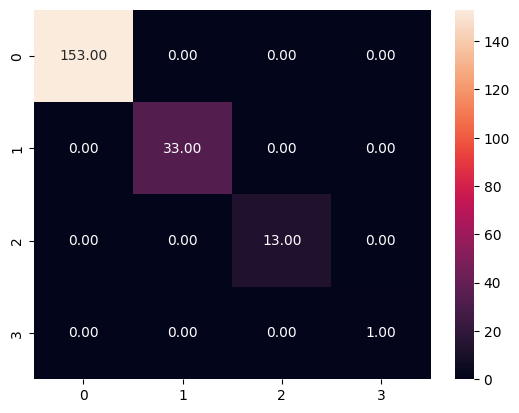

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns
conf = confusion_matrix(y_true, y_pred)
sns.heatmap(conf, annot=True ,fmt =".2f")